### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 지니지수는 얼마나 불확실한가(얼마나 많은 것들이 섞여있는가)를 의미하며 지니지수가 0이란 것은 불확실성이 0이라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미.

위 설명은 잘못된 듯 함 지니계수 == 불순도(impurity인듯?) : https://eunsukimme.github.io/ml/2019/11/10/Decision-Tree/

* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes  

https://injo.tistory.com/15


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)
# pruning(가지치기) : 마지막 leaf노드들이 root 노드까지 바로 가는데 걸리는 조건의 개수인 깊이를 제한
# df_clf = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=156)
# df_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=156)
# df_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=3, random_state=156)
# df_clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=3, random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
clf_report = classification_report(y_test, pred)

print(f'결정트리예측정확도: {accuracy:.4f}\n')
print(f'classification report:\n {clf_report}')

결정트리예측정확도: 0.9333

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [3]:
X_train

120

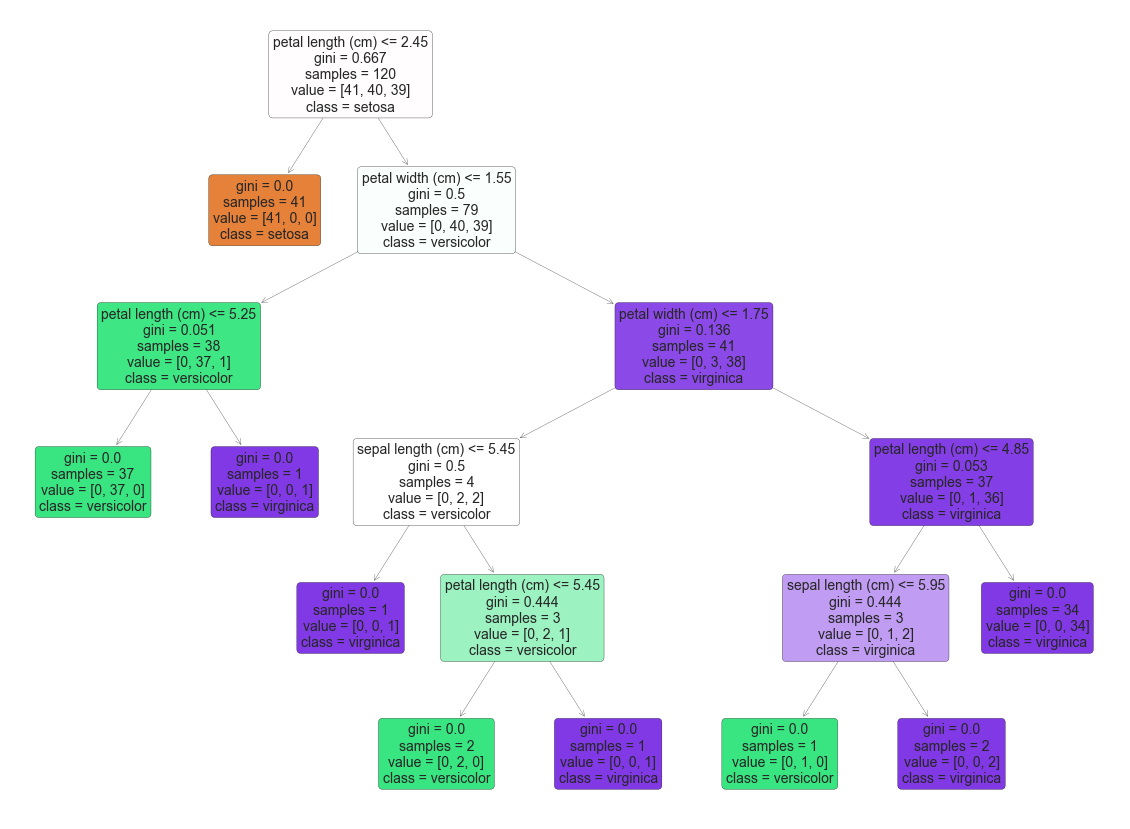

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf, filled= True,
                feature_names= iris_data.feature_names,
                class_names= iris_data.target_names,
                rounded=True,fontsize=14)
plt.show()
plt.close()

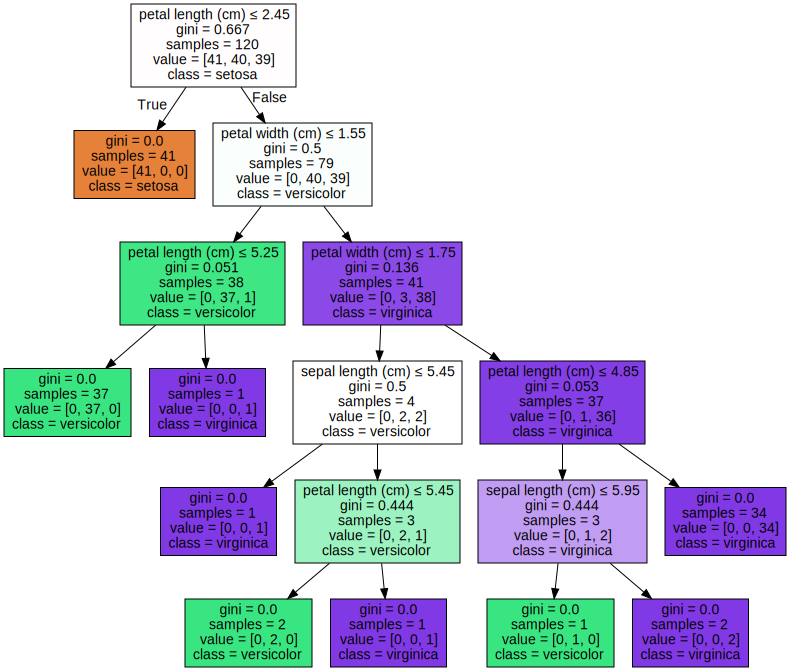

In [ ]:
import graphviz

dot_data = tree.export_graphviz(dt_clf,
                                out_file= None,
                                feature_names= iris_data.feature_names,
                                class_names= iris_data.target_names,
                                filled = True,
                                special_characters= True)
graphviz.Source(dot_data)

Feature importances:
[0.025 0.    0.555 0.42 ]
{name} : {value:.3f}
{name} : {value:.3f}
{name} : {value:.3f}
{name} : {value:.3f}


<AxesSubplot:>

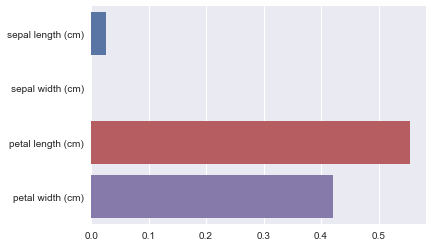

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline
plt.style.use('seaborn')

# feature importance 추출 
print(f"Feature importances:\n{np.round(dt_clf.feature_importances_, 3)}")

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{name} : {value:.3f}')

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 실습 - Human Activity Recognition

### [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [35]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./dataset/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


**중복된 피처명을 확인**

In [36]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


**원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.**  
**중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성**

In [37]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [38]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./dataset/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [39]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64

In [40]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [41]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [43]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [4, 8, 12, 16 ,20]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)

dpredictions = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8575
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [44]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
# cv_results_df[['param_max_depth', 'mean_test_score']]
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.070440,0.006243,0.007802,7.484048e-04,4,{'max_depth': 4},0.762746,0.875595,0.846939,0.851701,0.878912,0.843178,0.042152,5
1,1.944836,0.036562,0.008402,4.901936e-04,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,2
2,2.611494,0.144222,0.008002,1.784161e-07,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,4
3,2.871644,0.225644,0.007802,7.486724e-04,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
4,2.906882,0.227164,0.007402,4.895510e-04,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,3


In [45]:
max_depths = [4, 8, 12, 16 ,20]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 4 정확도: 0.8096
max_depth = 8 정확도: 0.8707
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548


In [46]:
params = {
    'max_depth' : [4, 8, 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
dpredictions = grid_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)

print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8717
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


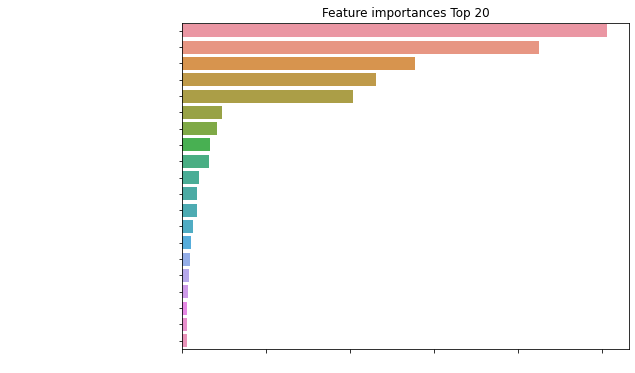

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
## 다크모드여서 흰색으로 표시
[t.set_color('white') for t in ax.xaxis.get_ticklabels()]
[t.set_color('white') for t in ax.yaxis.get_ticklabels()]
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
##
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()